In [107]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split

In [108]:
df = pd.read_csv('train1.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [109]:
df.isnull().mean() * 100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [110]:
X = df.drop(columns=['Survived'])
y = df['Survived']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
X_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [111]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [112]:
X_test.tail()

,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


In [113]:
X_train.loc[X_train['Age_imputed'].isnull(), 'Age_imputed'] = X_train['Age'].dropna().sample(X_train['Age_imputed'].isnull().sum()).values
X_test.loc[X_test['Age_imputed'].isnull(), 'Age_imputed'] = X_train['Age'].dropna().sample(X_test['Age_imputed'].isnull().sum()).values

In [114]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([36.  , 59.  , 16.  , 20.  , 36.  , 58.  , 14.  , 23.  , 48.  ,
       25.  , 27.  , 58.  , 39.  , 46.  , 17.  , 16.  , 32.  , 39.  ,
       28.  , 25.  , 26.  ,  2.  , 65.  , 30.  , 40.  , 34.  , 22.  ,
       40.  , 17.  , 34.5 , 21.  , 45.5 , 25.  , 18.  , 38.  , 31.  ,
       25.  , 29.  ,  4.  ,  8.  , 29.  , 45.  , 36.  , 71.  , 28.  ,
       51.  , 17.  , 21.  , 24.  , 38.  , 21.  ,  5.  , 13.  , 28.5 ,
       36.  , 21.  , 54.  , 20.  , 61.  , 37.  , 27.  ,  3.  , 24.  ,
       16.  , 61.  , 42.  , 43.  , 29.  , 24.  , 18.  , 53.  , 43.  ,
       28.  , 20.  , 26.  , 24.  , 24.  ,  4.  ,  2.  , 45.  , 22.  ,
       61.  , 34.  , 24.  , 19.  , 24.  , 37.  , 39.  , 16.  , 18.  ,
       30.  , 40.  , 22.  , 24.  , 38.  , 28.  , 16.  , 19.  , 36.  ,
       51.  , 12.  , 45.  , 20.  , 29.  , 45.  , 42.  , 39.  , 46.  ,
        6.  , 33.  , 38.  , 24.  , 18.  , 22.  , 32.  , 42.  ,  9.  ,
       14.  , 28.  , 28.  , 26.  , 36.  , 34.  ,  0.83,  7.  , 17.  ,
       34.  , 21.  ,

In [115]:
X_train['Age'].isnull().sum()

np.int64(148)

In [116]:
X_train

,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,42.0
493,71.0,49.5042,71.0
527,NaN,221.7792,16.0


C:\Users\Jay\AppData\Local\Temp\ipykernel_17304\2039780232.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],label='Original',hist=False)
C:\Users\Jay\AppData\Local\Temp\ipykernel_17304\2039780232.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age

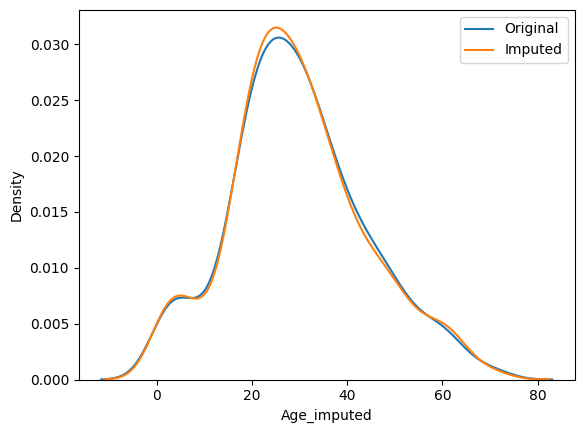

In [117]:
# 
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

In [118]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.34951339046142
Variance after random imputation:  204.13519504416948


In [119]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,54.748592
Age,71.512440,204.349513,204.349513
Age_imputed,54.748592,204.349513,204.135195


<Axes: >

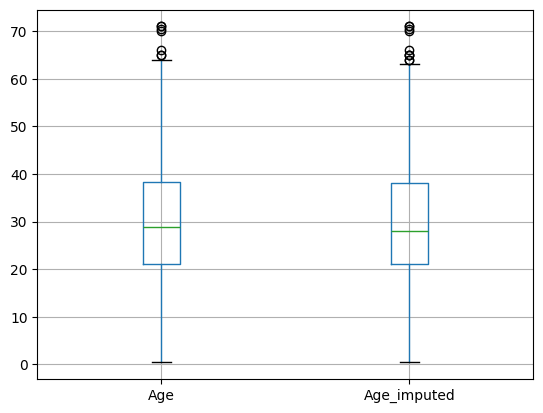

In [120]:
X_train[['Age', 'Age_imputed']].boxplot()

### Categorical data


In [121]:
data = pd.read_csv('house-train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])


In [122]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [123]:
data.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [124]:
X = data
y = data['SalePrice']

In [125]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [126]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [127]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
392,NaN,TA,106500,TA,NaN
743,TA,TA,175000,TA,TA
444,TA,TA,210000,TA,TA
723,NaN,TA,135000,TA,NaN
575,NaN,TA,118500,TA,NaN


In [128]:
X_train.loc[X_train['GarageQual_imputed'].isnull(), 'GarageQual_imputed'] = (
    X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum(), random_state=42).values
)
X_test.loc[X_test['GarageQual_imputed'].isnull(), 'GarageQual_imputed'] = (
    X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum(), random_state=42).values
)

X_train.loc[X_train['FireplaceQu_imputed'].isnull(), 'FireplaceQu_imputed'] = (
    X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum(), random_state=42).values
)
X_test.loc[X_test['FireplaceQu_imputed'].isnull(), 'FireplaceQu_imputed'] = (
    X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum(), random_state=42).values
)

In [130]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
TA,0.951043,0.952055
Fa,0.037171,0.036815
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [131]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.655443
TA,0.412439,0.533109
Fa,0.040917,0.052750
Po,0.027823,0.037037
Ex,0.024550,0.032548


C:\Users\Jay\AppData\Local\Temp\ipykernel_17304\1827688635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
C:\Users\Jay\AppData\Local\Temp\ipykernel_17304\1827688635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637

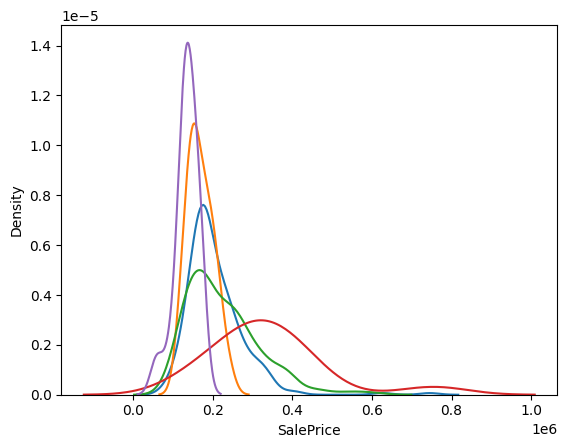

In [132]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

C:\Users\Jay\AppData\Local\Temp\ipykernel_17304\722808554.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
C:\Users\Jay\AppData\Local\Temp\ipykernel_17304\722808554.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed297445

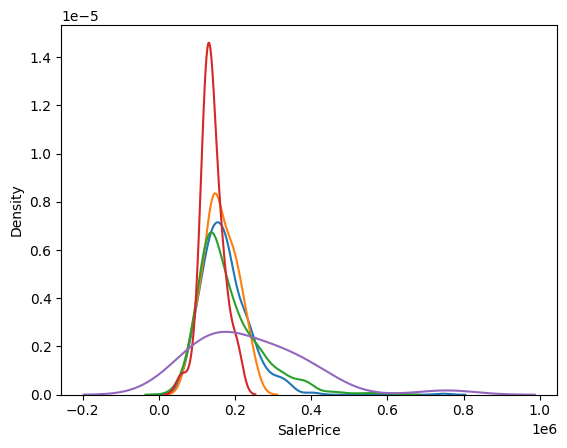

In [133]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()